In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train', 'test', 'train.csv', 'sample_submission.csv']


In [11]:
train_idx=pd.read_csv('../input/train.csv')
HEIGH=299#image.shape[1]
WIDTH=299#image.shape[2]
CHANEL=1#image.shape[3]
print(train_idx.shape)
print(train_idx[0:5])
#we treat this like unet arquitect and like a mask we replace target to 0 to 27 outputs from 0 to 1 values
NUM_CLASSES=28
y_df=[[int(i) for i in s.split()] for s in train_idx['Target']]


from skimage.transform import resize
from skimage import util 
img_size_target=299
def downsample(img):# not used
    
    if img_size_target==512:
        return img
    else:
        return resize(img, (img_size_target, img_size_target), mode='constant', preserve_range=True)
    
    
y_df_final=np.zeros((train_idx.shape[0],NUM_CLASSES)).astype(int)

for i,x in enumerate(y_df):
    for val in x:
        #print(x,val,i)    
        y_df_final[i,val]=1
print(y_df_final[0])   
print(y_df_final.shape)

(31072, 2)
                                     Id   Target
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
(31072, 28)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_idx, y_df_final, test_size=0.08, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28586, 2)
(2486, 2)
(28586, 28)
(2486, 28)


Using TensorFlow backend.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 128, 3)


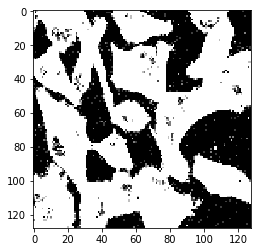

In [5]:
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img#,save_img
import cv2
name="../input/train/{}_red.png".format(X_train.values[1][0])
G=downsample(np.array(load_img(name)))
print(G.shape)
import matplotlib.pyplot as plt
plt.imshow(G)
plt.show()


(10, 299, 299, 3)


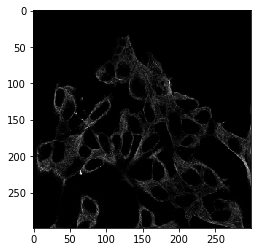

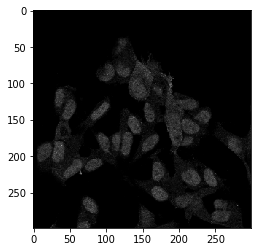

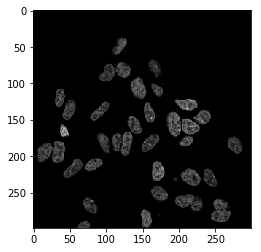

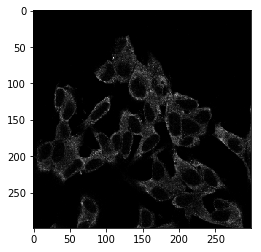

4
(28,)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0.]


In [21]:
def keras_genereatorv1(Xdata_set,ydata_set,batch_size):
      while True:
            random_indexes = np.random.choice(len(Xdata_set), batch_size)
            batch_R = np.empty((batch_size, img_size_target, img_size_target, 3))
            batch_G = np.empty((batch_size, img_size_target, img_size_target, 3))
            batch_B = np.empty((batch_size, img_size_target, img_size_target, 3))
            batch_Y = np.empty((batch_size, img_size_target, img_size_target, 3))
            #batch_mask = np.empty((batch_size, HEIGH, WIDTH, 3))
            batch_labels=np.empty((batch_size,28))
            
            for x in range(batch_size):            
                for i, idx in enumerate(random_indexes):
                    
                    #mask=get_mask(image)
                    name="../input/train/{}_red.png".format(X_train.values[idx][0])
                    R=(downsample(np.array(load_img(name))))/255
                    name="../input/train/{}_green.png".format(X_train.values[idx][0])
                    G=(downsample(np.array(load_img(name))))/255
                    name="../input/train/{}_blue.png".format(X_train.values[idx][0])
                    B=(downsample(np.array(load_img(name))))/255
                    name="../input/train/{}_yellow.png".format(X_train.values[idx][0])
                    Y=(downsample(np.array(load_img(name))))/255
                    batch_R[i] = R.reshape(img_size_target,img_size_target,3)
                    batch_G[i] = G.reshape(img_size_target,img_size_target,3)
                    batch_B[i] = B.reshape(img_size_target,img_size_target,3)
                    batch_Y[i] = Y.reshape(img_size_target,img_size_target,3)
             #       batch_mask[i] =mask/255
                    #new_list=[]
                    #new_list.append(x for x in ydata_set[idx])
                    #ret_list.append(x for x in ydata_set[idx])                    
                    
                    batch_labels[i]=ydata_set[idx]
            yield [batch_R,batch_G,batch_B,batch_Y],batch_labels#[r1,r2,r3,r4,r5,r6,r7,r8]
            
X,Y=next(keras_genereatorv1(X_train,y_train,10))
print(X[0].shape)
plt.imshow(X[0][0].reshape(img_size_target,img_size_target,3))
plt.show()
plt.imshow(X[1][0].reshape(img_size_target,img_size_target,3))
plt.show()
plt.imshow(X[2][0].reshape(img_size_target,img_size_target,3))
plt.show()
plt.imshow(X[3][0].reshape(img_size_target,img_size_target,3))
plt.show()
print(len(X))
print(Y[0].shape)
print(Y[0])

In [7]:
import keras
from keras import backend as K
import tensorflow as tf
from keras.models import Model
from keras.layers import merge,Input,Dense, concatenate, Conv2D, MaxPooling2D, UpSampling2D, Reshape, core, Dropout,Convolution2D,Activation,Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras.utils.vis_utils import plot_model as plot
from keras.optimizers import SGD

def f1_loss2(logits, labels):
    __small_value=1e-6
    beta = 1
    batch_size = logits.size()[0]
    p = F.sigmoid(logits)
    l = labels
    num_pos = torch.sum(p, 1) + __small_value
    num_pos_hat = torch.sum(l, 1) + __small_value
    tp = torch.sum(l * p, 1)
    precise = tp / num_pos
    recall = tp / num_pos_hat
    fs = (1 + beta * beta) * precise * recall / (beta * beta * precise + recall + __small_value)
    loss = fs.sum() / batch_size
    return (1 - loss)

def focal_loss(y_true, y_pred, gamma=2):
    # transform back to logits
    _epsilon = tf.convert_to_tensor(K.epsilon(), y_pred.dtype.base_dtype)
    y_pred = tf.clip_by_value(y_pred, _epsilon, 1 - _epsilon)
    y_pred = tf.log(y_pred / (1 - y_pred))

    input = tf.cast(y_pred, tf.float32)

    max_val = K.clip(-input, 0, 1)
    loss = input - input * y_true + max_val + K.log(K.exp(-max_val) + K.exp(-input - max_val))
    invprobs = tf.log_sigmoid(-input * (y_true * 2.0 - 1.0))
    loss = K.exp(invprobs * gamma) * loss

    return K.mean(K.sum(loss, axis=1))

def f1_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

def bce_f1_loss(y_true, y_pred):    
    return K.binary_crossentropy(y_true,y_pred)+f1_loss(y_true,y_pred)

In [17]:
import keras
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten,GlobalMaxPooling2D,BatchNormalization,AveragePooling2D
from keras.models import Model

# First, define the vision modules
digit_input = Input(shape=(img_size_target, img_size_target, 1))
x=Conv2D(32,5,5,border_mode="valid",subsample=(2,2),input_shape=(img_size_target,img_size_target,1))(digit_input)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D(pool_size=(2,2),strides=(2,2))(x)
x=Conv2D(32,5,5,border_mode="same")(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=Conv2D(64,3,3,border_mode="same")(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=Conv2D(64,3,3,border_mode="same")(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D(pool_size=(2,2),strides=(2,2))(x)
x=Conv2D(96,3,3,border_mode="same")(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=Conv2D(96,3,3,border_mode="valid")(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D(pool_size=(2,2),strides=(2,2))(x)
x=Conv2D(192,3,3,border_mode="same")(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=Conv2D(192,3,3,border_mode="valid")(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D(pool_size=(2,2),strides=(2,2))(x)
x=Flatten()(x)
x=Dense(output_dim=4096,input_dim=2*2*192)(x)
x=Activation('relu')(x)
#model.add(Dropout(0.4)) # for first level
x=Dropout(0.4)(x) # for sec level

x=Dense(output_dim=4096,input_dim=4096)(x)
x=Activation('relu')(x)
#model.add(Dropout(0.4)) # for first level
out=Dropout(0.4)(x) # for sec level


vision_model = Model(digit_input, out)
#vision_model.summary()

from keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size_target, img_size_target, 3)))


vision_model = Model(input=base_model.input, output=base_model.output)


#xmodel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#xmodel.summary()
# Then define the tell-digits-apart model
digit_a = Input(shape=(img_size_target, img_size_target, 3))
digit_b = Input(shape=(img_size_target, img_size_target, 3))
digit_c = Input(shape=(img_size_target, img_size_target, 3))
digit_d = Input(shape=(img_size_target, img_size_target, 3))

# The vision model will be shared, weights and all
out_a = vision_model(digit_a)
out_b = vision_model(digit_b)
out_c = vision_model(digit_c)
out_d = vision_model(digit_d)

concatenated = keras.layers.concatenate([out_a, out_b,out_c,out_d])

#t = base_model.output
t = AveragePooling2D(pool_size=(8, 8))(concatenated)
t = Dropout(.4)(t)
t = Flatten()(t)
predictions = Dense(28, init='glorot_uniform', W_regularizer=keras.regularizers.l2(.0005), activation='sigmoid')(t)


#out = Dense(1024, activation='relu')(concatenated)
#out = Dense(1024, activation='relu')(out)
#out = Dense(28, activation='sigmoid')(out)

classification_model = Model([digit_a, digit_b, digit_c, digit_d], predictions )
classification_model.summary()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(299, 299,..., strides=(2, 2), padding="valid")`
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
input_22 (InputLayer)           (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
input_23 (InputLayer)           (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
input_24 (InputLayer)           (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
model_11 (

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:78: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(28, activation="sigmoid", kernel_initializer="glorot_uniform", kernel_regularizer=<keras.reg...)`


In [18]:
opt = keras.optimizers.SGD(lr=.01, momentum=.9)
classification_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc',f1_loss,"binary_crossentropy",focal_loss])

In [22]:
Xvaldata,Yvaldata=next(keras_genereatorv1(X_test,y_test,10))
print("DONE")

DONE


In [ ]:
print("DONE")

In [ ]:
#X,Y=next(keras_genereatorv1(X_train,y_train,10))

classification_model.fit_generator(keras_genereatorv1(X_train,y_train,10),steps_per_epoch=100,epochs=25,validation_data=(Xvaldata,Yvaldata))
